# **Creando Mapas de Pobreza Multidimensional y Extrema a Nivel Entidad Federativa y Municipio**

Con información de [**INEGI**]("http://internet.contenidos.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463776079/mg_sep2019_integrado.zip"), y datos y definiciones de [**CONEVAL**](https://www.coneval.org.mx/InformesPublicaciones/FolletosInstitucionales/Documents/Medicion-multidimensional-de-la-pobreza-en-Mexico.pdf).

---

In [1]:
import geopandas as gpd                 # Geodata manipulation
import pandas as pd                     # Data manipulation
import matplotlib.pyplot as plt         # Data visualization
from matplotlib.lines import Line2D     # Utility for legend customization
import os                               # OS interaction
import re                               # Regular expressions
import warnings

warnings.filterwarnings('ignore')

In [2]:
HEAD = 10 # Variable for head

# **Nivel Entidad Federativa**

## **Importe y limpieza de datos**

### **Concentrado de Indicadores de Pobreza**

In [3]:
# Importa la data con el concentrado de indicadores de pobreza
pobind_ent  = pd.read_excel('data/Concentrado_indicadores_de_pobreza_2020.xlsx', sheet_name = 'Concentrado estatal', header = [4, 5])

# Dropea las primeras dos filas despues de los headers, estan en blanco
# en el file original
pobind_ent.drop(index = [0, 1], inplace = True)

# Selecciona los registros hasta el indice 32 (Zacatecas)
pobind_ent = pobind_ent.iloc[:32]

# Remueve la columna innecesaria con 'Unnamed: 0_level_0'
pobind_ent.drop(columns= [('Unnamed: 0_level_0', 'Unnamed: 0_level_1')], inplace = True)

# Muestra el dataframe
pobind_ent

Clave de entidad               Entidad federativa  \
   Unnamed: 1_level_1               Unnamed: 2_level_1   
2                  01                   Aguascalientes   
3                  02                  Baja California   
4                  03              Baja California Sur   
5                  04                         Campeche   
6                  05             Coahuila de Zaragoza   
7                  06                           Colima   
8                  07                          Chiapas   
9                  08                        Chihuahua   
10                 09                 Ciudad de México   
11                 10                          Durango   
12                 11                       Guanajuato   
13                 12                         Guerrero   
14                 13                          Hidalgo   
15                 14                          Jalisco   
16                 15                           México   
17                 16              Michoacán de Ocampo   
18                 17                          Morelos   
19                 18                          Nayarit   
20                 19                       Nuevo León   
21                 20                           Oaxaca   
22                 21                           Puebla   
23                 22                        Querétaro   
24                 23                     Quintana Roo   
25                 24                  San Luis Potosí   
26                 25                          Sinaloa   
27                 26                           Sonora   
28                 27                          Tabasco   
29                 28                       Tamaulipas   
30                 29                         Tlaxcala   
31                 30  Veracruz de Ignacio de la Llave   
32                 31                          Yucatán   
33                 32                        Zacatecas   

   Población 2010*\n(leer nota al final del cuadro)  \
                                 Unnamed: 3_level_1   
2                                         1198083.0   
3                                         3235371.0   
4                                          654837.0   
5                                          842088.0   
6                                         2790030.0   
7                                          663719.0   
8                                         4926289.0   
9                                         3534387.0   
10                                        8888531.0   
11                                        1675560.0   
12                                        5573313.0   
13                                        3448190.0   
14                                        2701833.0   
15                                        7467401.0   
16                                       15648934.0   
17                                        4430692.0   
18                                        1808804.0   
19                                        1115259.0   
20                                        4731410.0   
21                                        3875728.0   
22                                        5881716.0   
23                                        1852180.0   
24                                        1362303.0   
25                                        2624588.0   
26                                        2859776.0   
27                                        2730568.0   
28                                        2262147.0   
29                                        3341868.0   
30                                        1192068.0   
31                                        7724961.0   
32                                        1983718.0   
33                                        1512919.0   

   Población 2015*\n(leer nota al final del cuadro)  \
                                 Unnamed: 4_level_1   
2                                         1292901.0

In [4]:
# Crea una lista de tuplas con los headers de la tabla
pobind_ent_columns = [
    (main_title, re.sub('Unnamed.*', '', sub_title)          # Reemplaza las columnas con Unnamed con su primer titulo
    .replace('\n', ' ')                                      # Reemplaza las nuevas lineas '\n' con espacios
    .strip())                                                # Elimina espacios extra en el 
    for main_title, sub_title in pobind_ent.columns ]

# Muestra la lista
pobind_ent_columns[:HEAD]

[('Clave de entidad', ''),
 ('Entidad federativa', ''),
 ('Población 2010*\n(leer nota al final del cuadro)', ''),
 ('Población 2015*\n(leer nota al final del cuadro)', ''),
 ('Población 2020*\n(leer nota al final del cuadro)', ''),
 ('Pobreza', 'Porcentaje 2010'),
 ('Pobreza', 'Porcentaje 2015'),
 ('Pobreza', 'Porcentaje 2020'),
 ('Pobreza', 'Personas 2010'),
 ('Pobreza', 'Personas 2015')]

In [5]:
# Reemplaza el multiindex de columnas actual por el anterior
pobind_ent.columns = pd.MultiIndex.from_tuples(pobind_ent_columns)

# Imprime el dataframe resultado
pobind_ent

Clave de entidad               Entidad federativa  \
                                                       
2                01                   Aguascalientes   
3                02                  Baja California   
4                03              Baja California Sur   
5                04                         Campeche   
6                05             Coahuila de Zaragoza   
7                06                           Colima   
8                07                          Chiapas   
9                08                        Chihuahua   
10               09                 Ciudad de México   
11               10                          Durango   
12               11                       Guanajuato   
13               12                         Guerrero   
14               13                          Hidalgo   
15               14                          Jalisco   
16               15                           México   
17               16              Michoacán de Ocampo   
18               17                          Morelos   
19               18                          Nayarit   
20               19                       Nuevo León   
21               20                           Oaxaca   
22               21                           Puebla   
23               22                        Querétaro   
24               23                     Quintana Roo   
25               24                  San Luis Potosí   
26               25                          Sinaloa   
27               26                           Sonora   
28               27                          Tabasco   
29               28                       Tamaulipas   
30               29                         Tlaxcala   
31               30  Veracruz de Ignacio de la Llave   
32               31                          Yucatán   
33               32                        Zacatecas   

   Población 2010*\n(leer nota al final del cuadro)  \
                                                      
2                                         1198083.0   
3                                         3235371.0   
4                                          654837.0   
5                                          842088.0   
6                                         2790030.0   
7                                          663719.0   
8                                         4926289.0   
9                                         3534387.0   
10                                        8888531.0   
11                                        1675560.0   
12                                        5573313.0   
13                                        3448190.0   
14                                        2701833.0   
15                                        7467401.0   
16                                       15648934.0   
17                                        4430692.0   
18                                        1808804.0   
19                                        1115259.0   
20                                        4731410.0   
21                                        3875728.0   
22                                        5881716.0   
23                                        1852180.0   
24                                        1362303.0   
25                                        2624588.0   
26                                        2859776.0   
27                                        2730568.0   
28                                        2262147.0   
29                                        3341868.0   
30                                        1192068.0   
31                                        7724961.0   
32                                        1983718.0   
33                                        1512919.0   

   Población 2015*\n(leer nota al final del cuadro)  \
                                                      
2                                         1292901.0   
3                                         3499474.0   
4      

In [6]:
# Crea una lista de tuplas con las columnas de interes
pobind_ent_columns_int = [
    ('Clave de entidad', ''),
    ('Entidad federativa', ''),
    ('Pobreza extrema', 'Porcentaje 2020'),
    ('Pobreza extrema', 'Personas 2020')
]

# Selecciona solo esas columnas de interes para entidades federativas
pobind_ent = pobind_ent[pobind_ent_columns_int]

# Para simplificar el dataframe, quitamos multiindex en las columnas y dejamos
# solo un nivel de columna.
pobind_ent.columns = ['Clave de entidad', 'Entidad Federativa', 'Pobreza extrema - Porcentaje 2020', 'Pobreza extrema - Personas 2020']

# Muestra el dataframe
pobind_ent

,Clave de entidad,Entidad Federativa,Pobreza extrema - Porcentaje 2020,Pobreza extrema - Personas 2020
2,01,Aguascalientes,2.681827,36828.0
3,02,Baja California,1.720765,64399.0
4,03,Baja California Sur,3.498614,30979.0
5,04,Campeche,11.863963,116124.0
6,05,Coahuila de Zaragoza,2.299298,72175.0
7,06,Colima,2.710250,21303.0
8,07,Chiapas,28.295327,1580751.0
9,08,Chihuahua,3.165939,123222.0
10,09,Ciudad de México,4.726806,412240.0
11,10,Durango,4.372057,80982.0


### **Datos geoespaciales de las Entidades Federativas** 

In [7]:
# Importa el shape file de entidades federativas
geo_pob_ent = gpd.read_file("data/mg_sep2019_integrado/conjunto_de_datos/00ent.shp")

# Muesra el datatframe
geo_pob_ent

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
1,02,02,Baja California,"MULTIPOLYGON (((1493197.166 1849625.247, 14934..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946..."
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807..."
5,06,06,Colima,"MULTIPOLYGON (((1157633.318 768573.525, 115772..."
6,07,07,Chiapas,"POLYGON ((3560747.319 695090.732, 3561146.749 ..."
7,08,08,Chihuahua,"POLYGON ((1961978.327 2201082.365, 1961978.967..."
8,09,09,Ciudad de México,"POLYGON ((2802175.660 843326.718, 2801806.564 ..."
9,10,10,Durango,"POLYGON ((2107050.444 1641943.398, 2109767.527..."


In [8]:
def obten_resumen_pobreza(row, personas, porcentaje):
    return f"{row[personas]:,.0f} ({row[porcentaje]:.1f} %)"

In [9]:
# Combina los datos de indicadores con los datos geoespaciales
pobent = gpd.pd.merge(geo_pob_ent, pobind_ent, left_on = 'CVE_ENT', right_on = 'Clave de entidad').drop(columns = ['CVEGEO', 'CVE_ENT', 'NOMGEO'])

# Agrega una nueva columna con los datos de numero de personas y
# porcentaje de su poblacion
pobent['resumen'] = pobent.apply(lambda row: obten_resumen_pobreza(row, 'Pobreza extrema - Personas 2020', 'Pobreza extrema - Porcentaje 2020'), axis = 1)

# Agrega una columna con el % del area de la entidad correspondiente a todas las areas acumuladas
# (Republica Mexicana en su totalidad)
pobent['area_perc'] = pobent.geometry.area / pobent.geometry.area.sum()


# Crea un diccionario para reemplazar entidades con nombres muy grandes
entidades_largas = {
    'Michoacán de Ocampo': 'Michoacán',
    'Coahuila de Zaragoza': 'Coahuila',
    'Veracruz de Ignacio de la Llave': 'Veracruz'
}

# Crea una nueva columna con entidades largas reemplazadas
pobent['entidad_federativa'] = pobent['Entidad Federativa'].replace(entidades_largas)

# Muestra el dataframe de la Pobreza por Entidad
pobent

,geometry,Clave de entidad,Entidad Federativa,Pobreza extrema - Porcentaje 2020,Pobreza extrema - Personas 2020,resumen,area_perc,entidad_federativa
0,"POLYGON ((2470517.824 1155028.588, 2470552.248...",01,Aguascalientes,2.681827,36828.0,"36,828 (2.7 %)",0.002842,Aguascalientes
1,"MULTIPOLYGON (((1493197.166 1849625.247, 14934...",02,Baja California,1.720765,64399.0,"64,399 (1.7 %)",0.037584,Baja California
2,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",03,Baja California Sur,3.498614,30979.0,"30,979 (3.5 %)",0.037816,Baja California Sur
3,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",04,Campeche,11.863963,116124.0,"116,124 (11.9 %)",0.029270,Campeche
4,"POLYGON ((2469954.193 1978522.993, 2469982.807...",05,Coahuila de Zaragoza,2.299298,72175.0,"72,175 (2.3 %)",0.077027,Coahuila
5,"MULTIPOLYGON (((1157633.318 768573.525, 115772...",06,Colima,2.710250,21303.0,"21,303 (2.7 %)",0.002941,Colima
6,"POLYGON ((3560747.319 695090.732, 3561146.749 ...",07,Chiapas,28.295327,1580751.0,"1,580,751 (28.3 %)",0.037632,Chiapas
7,"POLYGON ((1961978.327 2201082.365, 1961978.967...",08,Chihuahua,3.165939,123222.0,"123,222 (3.2 %)",0.126260,Chihuahua
8,"POLYGON ((2802175.660 843326.718, 2801806.564 ...",09,Ciudad de México,4.726806,412240.0,"412,240 (4.7 %)",0.000760,Ciudad de México
9,"POLYGON ((2107050.444 1641943.398, 2109767.527...",10,Durango,4.372057,80982.0,"80,982 (4.4 %)",0.062437,Durango


In [10]:
# Define la geometria del geodataframe para poder visualizarlo
pobent.set_geometry('geometry', inplace = True)

In [11]:
# Obten las maximas longitudes de 'entidad_federativa' y 'resumen' para
# dar un formato standar en leyendas
max_entidad = max([len(item) for item in pobent['entidad_federativa']])
max_resumen = max([len(item) for item in pobent['resumen']])

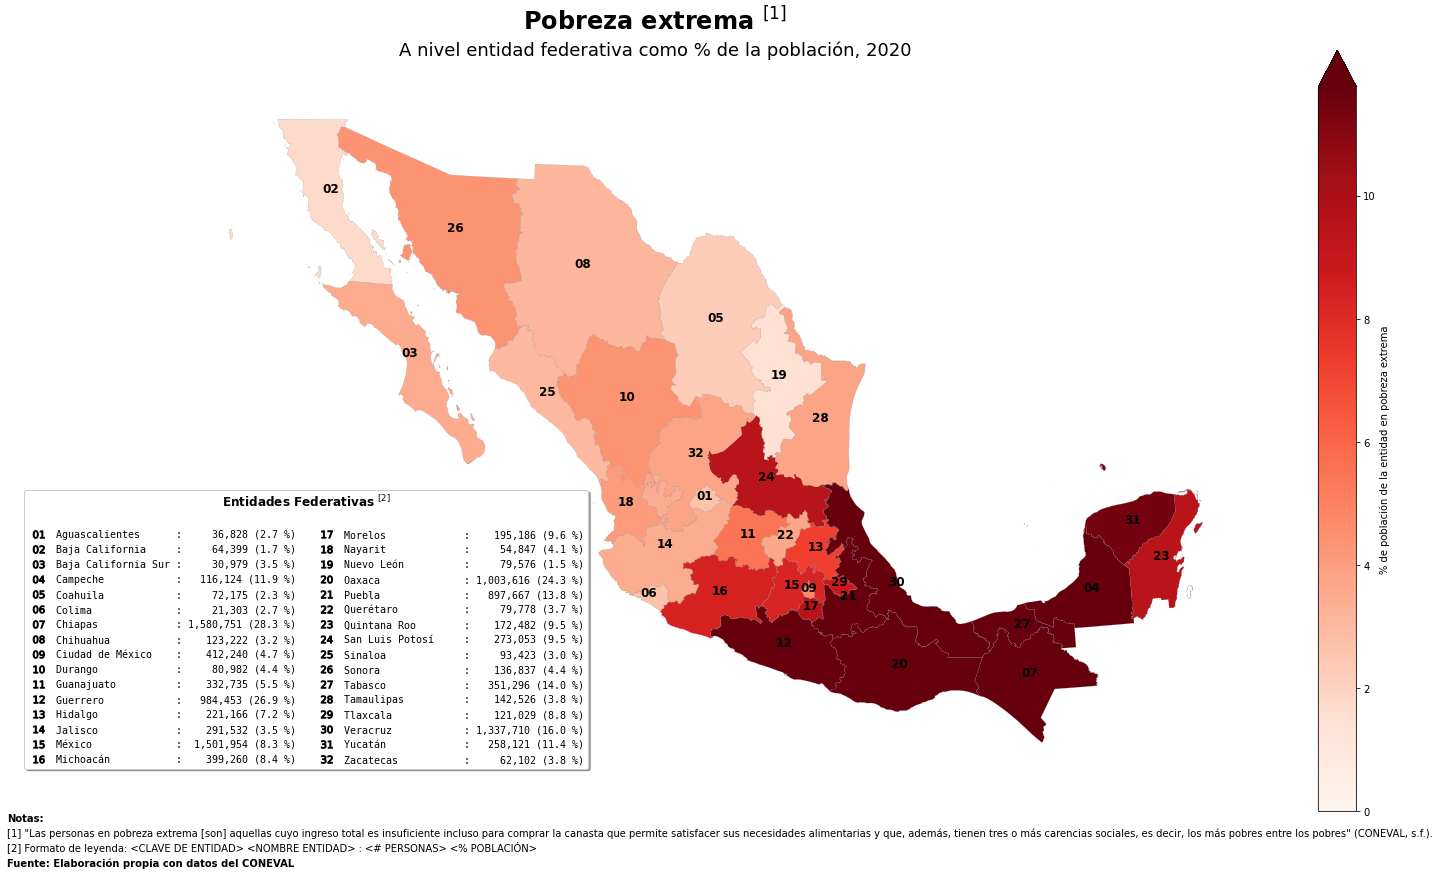

In [32]:
# plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize = (24, 14))

pobent.plot('Pobreza extrema - Porcentaje 2020', cmap = 'Reds', legend = True, ax = ax, edgecolors = 'grey', linewidth = 0.15,
            legend_kwds = {'label': '% de población de la entidad en pobreza extrema', 'extend': 'max'}, vmin = 0, vmax = pobent['Pobreza extrema - Porcentaje 2020'].quantile(.80))

legend_elements = []
labels = []

for i, row in pobent.iterrows():
    centroid = row.geometry.centroid
    x = centroid.x
    y = centroid.y

    entidad_federativa = row['entidad_federativa']
    resumen = row['resumen']

    label = f'{entidad_federativa:<{max_entidad+1}}:{resumen:>{max_resumen+1}}'
    labels.append(label)
    
    legend_elements.append(Line2D([0], [0], marker = f'${row["Clave de entidad"]}$', lw = 0, markersize = 12, color = 'black',
                                  label = label, markerfacecolor = 'black'))
    plt.text(x, y, row['Clave de entidad'], size = 12, ha = 'center', weight = 'bold')


# Agrega titulo al mapa
plt.figtext(0.4, 0.9,  'Pobreza extrema $^{[1]}$', size = 24, weight = 'bold', ha = 'center')
plt.figtext(0.4, 0.875, 'A nivel entidad federativa como % de la población, 2020', size = 18, ha = 'center')

# Agregar notas a pie de pagina
plt.figtext(0.025, 0.115, 'Notas:', weight = 'bold', ha = 'left')
plt.figtext(0.025, 0.100, '[1] "Las personas en pobreza extrema [son] aquellas cuyo ingreso total es insuficiente incluso para comprar la canasta que permite satisfacer sus necesidades alimentarias y que, además, tienen tres o más carencias sociales, es decir, los más pobres entre los pobres" (CONEVAL, s.f.).')
plt.figtext(0.025, 0.085, '[2] Formato de leyenda: <CLAVE DE ENTIDAD> <NOMBRE ENTIDAD> : <# PERSONAS> <% POBLACIÓN>', ha = 'left')
plt.figtext(0.025, 0.070, 'Fuente: Elaboración propia con datos del CONEVAL', ha = 'left', weight = 'bold')

# However, this only improves things slightly. This is because matplotlib is using a variable-width font by default, 
# meaning characters like m take up more space than characters like i. This is fixed by using a fixed-width font. 
# In matplotlib, this is achieved by:
# pl.legend(legends, loc=1, prop={'family': 'monospace'})
plt.legend(handles = legend_elements, bbox_to_anchor = (-0.15, 0), loc = 'lower left', title = 'Entidades Federativas $^{[2]}$\n', ncol = 2, shadow = True,
           prop = {'family': 'monospace'}, title_fontproperties = {'weight': 'bold', 'size': '12'})

_ = plt.axis('off')
plt.savefig('img/entidad_federativa_pobreza_extrema.png', facecolor = 'white')

## **Nivel Municipal**

### **Concentrado de Indicadores a nivel municipal**

In [13]:
# Importa la data con el concentrado de indicadores de pobreza
pobind_mun  = pd.read_excel('data/Concentrado_indicadores_de_pobreza_2020.xlsx', sheet_name = 'Concentrado municipal', header = [4, 5],
                            dtype = {('Clave de municipio', 'Unnamed: 3_level_1'): 'str'})

# Dropea las primeras dos filas despues de los headers, estan en blanco
# en el file original
pobind_mun.drop(index = [0, 1], inplace = True)

# Selecciona los registros hasta el indice 32 (Zacatecas)
pobind_mun.dropna(subset = [('Clave de municipio', 'Unnamed: 3_level_1')], inplace = True)

# Muestra el dataframe
pobind_mun

Unnamed: 0_level_0   Clave de entidad Entidad federativa  \
     Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
2                   NaN                 01     Aguascalientes   
3                   NaN                 01     Aguascalientes   
4                   NaN                 01     Aguascalientes   
5                   NaN                 01     Aguascalientes   
6                   NaN                 01     Aguascalientes   
...                 ...                ...                ...   
2466                NaN                 32          Zacatecas   
2467                NaN                 32          Zacatecas   
2468                NaN                 32          Zacatecas   
2469                NaN                 32          Zacatecas   
2470                NaN                 32          Zacatecas   

     Clave de municipio              Municipio  \
     Unnamed: 3_level_1     Unnamed: 4_level_1   
2                 01001         Aguascalientes   
3                 01002               Asientos   
4                 01003               Calvillo   
5                 01004                  Cosío   
6                 01005            Jesús María   
...                 ...                    ...   
2466              32054          Villa Hidalgo   
2467              32055             Villanueva   
2468              32056              Zacatecas   
2469              32057               Trancoso   
2470              32058  Santa María de la Paz   

     Población 2010*\n(leer nota al final del cuadro)  \
                                   Unnamed: 5_level_1   
2                                              801807   
3                                               48358   
4                                               57627   
5                                               14929   
6                                              102211   
...                                               ...   
2466                                            15994   
2467                                            26460   
2468                                           136708   
2469                                            19094   
2470                                             2810   

     Población 2015*\n(leer nota al final del cuadro)  \
                                   Unnamed: 6_level_1   
2                                              861446   
3                                               46624   
4                                               52773   
5                                               15321   
6                                              125750   
...                                               ...   
2466                                            18155   
2467                                            29957   
2468                                           150854   
2469                                            18716   
2470                                             2658   

     Población 2020*\n(leer nota al final del cuadro)          Pobreza  \
                                   Unnamed: 7_level_1 Porcentaje\n2010   
2                                              922268          30.2214   
3                                               48635        65.540534   
4                                               52377        68.403046   
5                                               15942        54.199297   
6                                              127962        42.377572   
...                                               ...              ...   
2466                                            20674        79.782877   
2467                                            32969        71.677217   
2468                                           149864        31.189164   
2469                                            20270        75.709837   
2470                                             2792        65.271533   

                       ...  \
     Porcentaje\n2015  ...   
2

In [14]:
# Define una lista de columnas de interes para visualizar la pobreza
# a nivel municipal
pobind_mun_columns_int = [
    ('Entidad federativa', 'Unnamed: 2_level_1'),
    ('Clave de municipio', 'Unnamed: 3_level_1'),
    ('Municipio', 'Unnamed: 4_level_1'),
    ('Pobreza', 'Porcentaje\n2020'),
    ('Pobreza', 'Personas\n2020'),
    ('Pobreza extrema', 'Porcentaje\n2020'),
    ('Pobreza extrema', 'Personas\n2020')
]

In [15]:
# Redefine el dataframe de pobind_mun con SOLO las columnas de interés
pobind_mun = pobind_mun[pobind_mun_columns_int]

# Muestra el dataframe
pobind_mun

Entidad federativa Clave de municipio              Municipio  \
     Unnamed: 2_level_1 Unnamed: 3_level_1     Unnamed: 4_level_1   
2        Aguascalientes              01001         Aguascalientes   
3        Aguascalientes              01002               Asientos   
4        Aguascalientes              01003               Calvillo   
5        Aguascalientes              01004                  Cosío   
6        Aguascalientes              01005            Jesús María   
...                 ...                ...                    ...   
2466          Zacatecas              32054          Villa Hidalgo   
2467          Zacatecas              32055             Villanueva   
2468          Zacatecas              32056              Zacatecas   
2469          Zacatecas              32057               Trancoso   
2470          Zacatecas              32058  Santa María de la Paz   

              Pobreza                 Pobreza extrema                 
     Porcentaje\n2020 Personas\n2020 Porcentaje\n2020 Personas\n2020  
2           23.682258         218414         1.974081          18206  
3           40.131881          19518         4.142806           2015  
4           45.755944          23966         4.498973           2356  
5           37.039182           5905         3.377118            538  
6           26.341836          33708         3.285401           4204  
...               ...            ...              ...            ...  
2466        74.890613          15483         9.009267           1863  
2467        50.572846          16673         4.291263           1415  
2468        23.390702          35054         2.550299           3822  
2469        63.945175          12962         6.366059           1290  
2470        47.955035           1339         2.441472             68  

[2469 rows x 7 columns]

In [16]:
# Pasa de dos niveles de columna a 1 solo 1
pobind_mun_columns = [f'{level_1}' if 'Unnamed' in level_2 else f'{level_1} - {level_2}'.replace('\n', ' ') for level_1, level_2 in pobind_mun.columns]

# Muestra las nuevas columnas
pobind_mun_columns

['Entidad federativa',
 'Clave de municipio',
 'Municipio',
 'Pobreza - Porcentaje 2020',
 'Pobreza - Personas 2020',
 'Pobreza extrema - Porcentaje 2020',
 'Pobreza extrema - Personas 2020']

In [17]:
# Edita el dataframe y cambia el nombre de sus columnas
pobind_mun.columns = pobind_mun_columns

# Muestra el dataframe
pobind_mun

,Entidad federativa,Clave de municipio,Municipio,Pobreza - Porcentaje 2020,Pobreza - Personas 2020,Pobreza extrema - Porcentaje 2020,Pobreza extrema - Personas 2020
2,Aguascalientes,01001,Aguascalientes,23.682258,218414,1.974081,18206
3,Aguascalientes,01002,Asientos,40.131881,19518,4.142806,2015
4,Aguascalientes,01003,Calvillo,45.755944,23966,4.498973,2356
5,Aguascalientes,01004,Cosío,37.039182,5905,3.377118,538
6,Aguascalientes,01005,Jesús María,26.341836,33708,3.285401,4204
...,...,...,...,...,...,...,...
2466,Zacatecas,32054,Villa Hidalgo,74.890613,15483,9.009267,1863
2467,Zacatecas,32055,Villanueva,50.572846,16673,4.291263,1415
2468,Zacatecas,32056,Zacatecas,23.390702,35054,2.550299,3822
2469,Zacatecas,32057,Trancoso,63.945175,12962,6.366059,1290


Una vez teniendo el concentrado de indicadores pobreza a nivel municipal limpio, es necesario importar los datos geoespaciales.

### **Datos geoespaciales a nivel municipal**

In [18]:
# Importa los datos geoespaciales mediante el shape file
geo_pob_mun = gpd.read_file('data/mg_sep2019_integrado/conjunto_de_datos/00mun.shp')

# Muestrea el head del geodataframe
geo_pob_mun.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774..."
1,01002,01,002,Asientos,"POLYGON ((2494680.261 1141224.505, 2494749.948..."
2,01003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902..."
3,01004,01,004,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
4,01005,01,005,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546..."


Una vez teniendo ambos dataframes, uniremos el **concentrado de indicadores** y **datos geoespaciales** mediante la `Clave de municipio` en el primer dataframe y `CVEGEO` en el segundo.

In [19]:
# Combina los dataframes geoespial - indicador y dropea columnas duplicadas e.g. 'CVEGEO', 'CVE_ENT'...
pobmun = gpd.pd.merge(geo_pob_mun, pobind_mun, left_on = 'CVEGEO', right_on = 'Clave de municipio').drop(columns = ['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'NOMGEO'])

# Reemplaza valores 'n.d.' con np.NaN
pobmun.replace({'n.d.': pd.np.nan}, inplace = True)

# Reemplaza los valores de columnas con pobreza a float
pobmun.astype(dict.fromkeys([col for col in pobmun.columns if 'Pobreza' in col], 'float64'))

# Muestra el dataframe
pobmun

,geometry,Entidad federativa,Clave de municipio,Municipio,Pobreza - Porcentaje 2020,Pobreza - Personas 2020,Pobreza extrema - Porcentaje 2020,Pobreza extrema - Personas 2020
0,"POLYGON ((2489072.503 1115771.584, 2489352.774...",Aguascalientes,01001,Aguascalientes,23.682258,218414.0,1.974081,18206.0
1,"POLYGON ((2494680.261 1141224.505, 2494749.948...",Aguascalientes,01002,Asientos,40.131881,19518.0,4.142806,2015.0
2,"POLYGON ((2429607.454 1120262.254, 2429071.902...",Aguascalientes,01003,Calvillo,45.755944,23966.0,4.498973,2356.0
3,"POLYGON ((2470517.824 1155028.588, 2470552.248...",Aguascalientes,01004,Cosío,37.039182,5905.0,3.377118,538.0
4,"POLYGON ((2465526.729 1114740.466, 2465752.546...",Aguascalientes,01005,Jesús María,26.341836,33708.0,3.285401,4204.0
...,...,...,...,...,...,...,...,...
2460,"POLYGON ((2531223.368 1166188.348, 2531242.386...",Zacatecas,32054,Villa Hidalgo,74.890613,15483.0,9.009267,1863.0
2461,"POLYGON ((2420011.778 1183552.394, 2420043.461...",Zacatecas,32055,Villanueva,50.572846,16673.0,4.291263,1415.0
2462,"POLYGON ((2421707.751 1202019.971, 2421780.086...",Zacatecas,32056,Zacatecas,23.390702,35054.0,2.550299,3822.0
2463,"POLYGON ((2476976.320 1198274.003, 2476566.139...",Zacatecas,32057,Trancoso,63.945175,12962.0,6.366059,1290.0


In [20]:
# Crea columnas resumen para pobeza y pobreza extrema
pobmun['pobreza_resumen'] = pobmun.apply(lambda row: obten_resumen_pobreza(row, 'Pobreza - Personas 2020', 'Pobreza - Porcentaje 2020'), axis = 1)
pobmun['pobreza_extrema_resumen'] = pobmun.apply(lambda row: obten_resumen_pobreza(row, 'Pobreza extrema - Personas 2020', 'Pobreza extrema - Porcentaje 2020'), axis = 1)

In [21]:
# Crea una columna con entidad y municipio unidos
pobmun['entidad_municipio'] = pobmun.apply(lambda row: row['Entidad federativa'] + ', ' + row['Municipio'], axis = 1)

In [22]:
# Define la geometria del geodataframe
pobmun.set_geometry('geometry', inplace = True)

Pobreza multidimensional a nivel municipal

Hacer tabla para legenda top 10 mas pobres, top 10 mas con nombre entidad, municipio y % personas

In [23]:
# Genera un dataframe con columnas de interes para crear las tablas de top 10
pobmun_legend = pobmun[
    ['Entidad federativa' ,'Municipio', 'entidad_municipio',
     'Pobreza - Personas 2020', 'Pobreza - Porcentaje 2020', 'pobreza_resumen',
     'Pobreza extrema - Personas 2020', 'Pobreza extrema - Porcentaje 2020', 'pobreza_extrema_resumen'
     ]]

# Muestrael dataframe
pobmun_legend.head()

,Entidad federativa,Municipio,entidad_municipio,Pobreza - Personas 2020,Pobreza - Porcentaje 2020,pobreza_resumen,Pobreza extrema - Personas 2020,Pobreza extrema - Porcentaje 2020,pobreza_extrema_resumen
0,Aguascalientes,Aguascalientes,"Aguascalientes, Aguascalientes",218414.0,23.682258,"218,414 (23.7 %)",18206.0,1.974081,"18,206 (2.0 %)"
1,Aguascalientes,Asientos,"Aguascalientes, Asientos",19518.0,40.131881,"19,518 (40.1 %)",2015.0,4.142806,"2,015 (4.1 %)"
2,Aguascalientes,Calvillo,"Aguascalientes, Calvillo",23966.0,45.755944,"23,966 (45.8 %)",2356.0,4.498973,"2,356 (4.5 %)"
3,Aguascalientes,Cosío,"Aguascalientes, Cosío",5905.0,37.039182,"5,905 (37.0 %)",538.0,3.377118,538 (3.4 %)
4,Aguascalientes,Jesús María,"Aguascalientes, Jesús María",33708.0,26.341836,"33,708 (26.3 %)",4204.0,3.285401,"4,204 (3.3 %)"


In [24]:
# Genera la tabla con los top 10 más pobres
pobmun_legend_10_mas = pobmun_legend.sort_values('Pobreza - Porcentaje 2020', ascending = False).iloc[:HEAD]

# muestra el top 10 mas pobre
pobmun_legend_10_mas

,Entidad federativa,Municipio,entidad_municipio,Pobreza - Personas 2020,Pobreza - Porcentaje 2020,pobreza_resumen,Pobreza extrema - Personas 2020,Pobreza extrema - Porcentaje 2020,pobreza_extrema_resumen
1356,Oaxaca,San Simón Zahuatlán,"Oaxaca, San Simón Zahuatlán",4925.0,99.646676,"4,925 (99.6 %)",4168.0,84.328522,"4,168 (84.3 %)"
448,Guerrero,Cochoapa el Grande,"Guerrero, Cochoapa el Grande",21844.0,99.441567,"21,844 (99.4 %)",18504.0,84.234066,"18,504 (84.2 %)"
1020,Oaxaca,Coicoyán de las Flores,"Oaxaca, Coicoyán de las Flores",9500.0,99.303056,"9,500 (99.3 %)",7878.0,82.350470,"7,878 (82.4 %)"
190,Chiapas,San Juan Cancuc,"Chiapas, San Juan Cancuc",38036.0,99.256847,"38,036 (99.3 %)",25155.0,65.641811,"25,155 (65.6 %)"
1155,Oaxaca,San Francisco Teopan,"Oaxaca, San Francisco Teopan",310.0,99.252459,310 (99.3 %),138.0,44.127869,138 (44.1 %)
103,Chiapas,Chanal,"Chiapas, Chanal",13690.0,99.110794,"13,690 (99.1 %)",9388.0,67.963444,"9,388 (68.0 %)"
1235,Oaxaca,San Lucas Camotlán,"Oaxaca, San Lucas Camotlán",3156.0,98.985103,"3,156 (99.0 %)",1777.0,55.733439,"1,777 (55.7 %)"
191,Chiapas,Aldama,"Chiapas, Aldama",8473.0,98.948245,"8,473 (98.9 %)",5050.0,58.976399,"5,050 (59.0 %)"
101,Chiapas,Chalchihuitán,"Chiapas, Chalchihuitán",21881.0,98.869168,"21,881 (98.9 %)",16918.0,76.443306,"16,918 (76.4 %)"
1288,Oaxaca,San Miguel Tilquiápam,"Oaxaca, San Miguel Tilquiápam",3104.0,98.789338,"3,104 (98.8 %)",2168.0,68.992569,"2,168 (69.0 %)"


In [25]:
# Obten los top 10 menos pobres
pobmun_legend_10_men = pobmun_legend.sort_values('Pobreza - Porcentaje 2020', ascending = True).iloc[:HEAD]

# Muestra el top 10 menos pobre
pobmun_legend_10_men

,Entidad federativa,Municipio,entidad_municipio,Pobreza - Personas 2020,Pobreza - Porcentaje 2020,pobreza_resumen,Pobreza extrema - Personas 2020,Pobreza extrema - Porcentaje 2020,pobreza_extrema_resumen
972,Nuevo León,San Pedro Garza García,"Nuevo León, San Pedro Garza García",6438.0,5.450951,"6,438 (5.5 %)",336.0,0.284729,336 (0.3 %)
993,Nuevo León,Parás,"Nuevo León, Parás",63.0,7.317821,63 (7.3 %),2.0,0.246311,2 (0.2 %)
282,Ciudad de México,Benito Juárez,"Ciudad de México, Benito Juárez",29466.0,7.883826,"29,466 (7.9 %)",1167.0,0.312266,"1,167 (0.3 %)"
955,Nuevo León,Agualeguas,"Nuevo León, Agualeguas",278.0,8.705023,278 (8.7 %),14.0,0.426180,14 (0.4 %)
1930,Sonora,Huépac,"Sonora, Huépac",98.0,9.748634,98 (9.7 %),0.0,0.000000,0 (0.0 %)
987,Nuevo León,Marín,"Nuevo León, Marín",475.0,9.838420,475 (9.8 %),29.0,0.608219,29 (0.6 %)
256,Chihuahua,Riva Palacio,"Chihuahua, Riva Palacio",790.0,9.873940,790 (9.9 %),17.0,0.207847,17 (0.2 %)
981,Nuevo León,Higueras,"Nuevo León, Higueras",131.0,9.985915,131 (10.0 %),17.0,1.270571,17 (1.3 %)
988,Nuevo León,Melchor Ocampo,"Nuevo León, Melchor Ocampo",141.0,10.069015,141 (10.1 %),3.0,0.237958,3 (0.2 %)
954,Nuevo León,Abasolo,"Nuevo León, Abasolo",291.0,10.379408,291 (10.4 %),14.0,0.512341,14 (0.5 %)


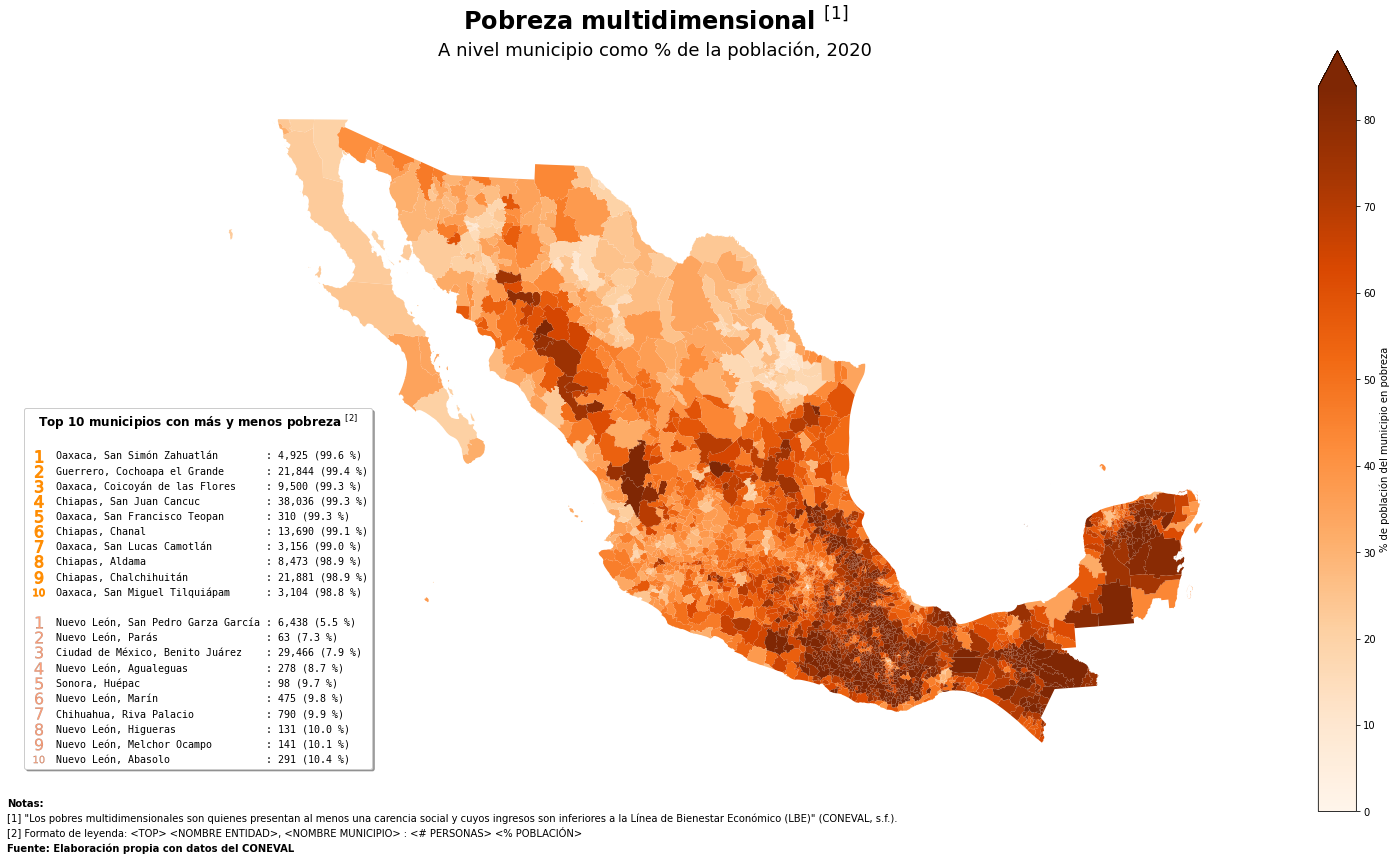

In [26]:
# Crea una figura nuevaaa
fig, ax = plt.subplots(figsize = (24, 14))

# Gráfica la pobreza multidimensional 
pobmun.plot(column = 'Pobreza - Porcentaje 2020', ax = ax, cmap = 'Oranges', legend = True,
            vmin = 0, vmax = pobmun['Pobreza - Porcentaje 2020'].quantile(0.8),
            legend_kwds = {'label': '% de población del municipio en pobreza', 'extend': 'max'})

# Obten el maximo de los top 10 municipios con mas pobreza
pobmun_legend_10_mas_max = pobmun_legend_10_mas["entidad_municipio"].str.len().max()

# Obten el maximo de los top 10 municipios con menos pobreza
pobmun_legend_10_men_max = pobmun_legend_10_men["entidad_municipio"].str.len().max()

# Obten el maximo de los maximos de top 10
pobmun_legend_10_max = max([pobmun_legend_10_mas_max, pobmun_legend_10_men_max])

handles = []

top_ix = 1

# Agrega los top 10 municipios con más pobreza
for i, municipio in pobmun_legend_10_mas.iterrows():

    label = f'{municipio["entidad_municipio"]:<{pobmun_legend_10_max}} : {municipio["pobreza_resumen"]}'

    # Define la etiqueta de la leyenda
    legend_label = Line2D([0], [0], linewidth = 0, marker = f'${top_ix}$', label = label, markersize = 12,
                        color = 'darkorange')
    
    # Agrega a la lista de handles para la leyenda
    handles.append(legend_label)

    # Agrega +1 al indice actual
    top_ix += 1

# Agrega una etiqueta vacia par separar entre mas pobres y menos
handles.append(Line2D([0], [0], linewidth = 0))

# Agrega los top 10 municipios con menos pobreza
top_ix = 1

# Agrega los top 10 municipios con menos pobreza
for i, municipio in pobmun_legend_10_men.iterrows():

    label = f'{municipio["entidad_municipio"]:<{pobmun_legend_10_max}} : {municipio["pobreza_resumen"]}'

    # Define la etiqueta de la leyenda
    legend_label = Line2D([0], [0], linewidth = 0, marker = f'${top_ix}$', label = label, markersize = 12,
                        color = 'lightsalmon', markeredgecolor = 'black', markeredgewidth = 0.1)
    
    # Agrega a la lista de handles para la leyenda
    handles.append(legend_label)

    # Agrega +1 al indice actual
    top_ix += 1


# Agrega titulo al mapa
plt.figtext(0.4, 0.9,  'Pobreza multidimensional $^{[1]}$', size = 24, weight = 'bold', ha = 'center')
plt.figtext(0.4, 0.875, 'A nivel municipio como % de la población, 2020', size = 18, ha = 'center')

# Agregar notas a pie de pagina
plt.figtext(0.025, 0.130, 'Notas:', weight = 'bold', ha = 'left')
plt.figtext(0.025, 0.115, '[1] "Los pobres multidimensionales son quienes presentan al menos una carencia social y cuyos ingresos son inferiores a la Línea de Bienestar Económico (LBE)" (CONEVAL, s.f.).', ha = 'left')
plt.figtext(0.025, 0.100, '[2] Formato de leyenda: <TOP> <NOMBRE ENTIDAD>, <NOMBRE MUNICIPIO> : <# PERSONAS> <% POBLACIÓN>', ha = 'left')
plt.figtext(0.025, 0.085, 'Fuente: Elaboración propia con datos del CONEVAL', ha = 'left', weight = 'bold')

# However, this only improves things slightly. This is because matplotlib is using a variable-width font by default, 
# meaning characters like m take up more space than characters like i. This is fixed by using a fixed-width font. 
# In matplotlib, this is achieved by:
# pl.legend(legends, loc=1, prop={'family': 'monospace'})
plt.legend(handles = handles, bbox_to_anchor = (-0.15, 0), loc = 'lower left', title = 'Top 10 municipios con más y menos pobreza $^{[2]}$\n', ncol = 1, shadow = True,
           prop = {'family': 'monospace'}, title_fontproperties = {'weight': 'bold', 'size': 12})

# Turn off the axis
_ = plt.axis('off')

Pobreza **extrema** multidimensional a nivel municipal

In [27]:
# Genera top 10 de pobreza extrema
pobmun_extrem_legend_10_mas = pobmun_legend.sort_values('Pobreza extrema - Porcentaje 2020', ascending = False)[:HEAD]

# Muestra los top 10 con más pobreza extrema
pobmun_extrem_legend_10_mas

,Entidad federativa,Municipio,entidad_municipio,Pobreza - Personas 2020,Pobreza - Porcentaje 2020,pobreza_resumen,Pobreza extrema - Personas 2020,Pobreza extrema - Porcentaje 2020,pobreza_extrema_resumen
1454,Oaxaca,Santiago Amoltepec,"Oaxaca, Santiago Amoltepec",13692.0,98.782286,"13,692 (98.8 %)",11705.0,84.447850,"11,705 (84.4 %)"
1356,Oaxaca,San Simón Zahuatlán,"Oaxaca, San Simón Zahuatlán",4925.0,99.646676,"4,925 (99.6 %)",4168.0,84.328522,"4,168 (84.3 %)"
448,Guerrero,Cochoapa el Grande,"Guerrero, Cochoapa el Grande",21844.0,99.441567,"21,844 (99.4 %)",18504.0,84.234066,"18,504 (84.2 %)"
1020,Oaxaca,Coicoyán de las Flores,"Oaxaca, Coicoyán de las Flores",9500.0,99.303056,"9,500 (99.3 %)",7878.0,82.350470,"7,878 (82.4 %)"
1358,Oaxaca,Santa Ana Ateixtlahuaca,"Oaxaca, Santa Ana Ateixtlahuaca",464.0,97.229299,464 (97.2 %),375.0,78.513800,375 (78.5 %)
1244,Oaxaca,San Martín Itunyoso,"Oaxaca, San Martín Itunyoso",2682.0,97.539089,"2,682 (97.5 %)",2122.0,77.178955,"2,122 (77.2 %)"
101,Chiapas,Chalchihuitán,"Chiapas, Chalchihuitán",21881.0,98.869168,"21,881 (98.9 %)",16918.0,76.443306,"16,918 (76.4 %)"
1044,Oaxaca,Huautepec,"Oaxaca, Huautepec",6226.0,97.469620,"6,226 (97.5 %)",4809.0,75.286392,"4,809 (75.3 %)"
1175,Oaxaca,San José Tenango,"Oaxaca, San José Tenango",17488.0,96.563644,"17,488 (96.6 %)",13320.0,73.547824,"13,320 (73.5 %)"
1395,Oaxaca,Santa Lucía Miahuatlán,"Oaxaca, Santa Lucía Miahuatlán",3313.0,98.090964,"3,313 (98.1 %)",2463.0,72.943373,"2,463 (72.9 %)"


In [28]:
# Genera los top 10 municipios con menos pobreza extrema
pobmun_extrem_legend_10_men = pobmun_legend.sort_values('Pobreza extrema - Porcentaje 2020', ascending = True)[:HEAD]

# Muestra los top 10 con menos pobreza extrema
pobmun_extrem_legend_10_men

,Entidad federativa,Municipio,entidad_municipio,Pobreza - Personas 2020,Pobreza - Porcentaje 2020,pobreza_resumen,Pobreza extrema - Personas 2020,Pobreza extrema - Porcentaje 2020,pobreza_extrema_resumen
1930,Sonora,Huépac,"Sonora, Huépac",98.0,9.748634,98 (9.7 %),0.0,0.000000,0 (0.0 %)
2009,Tamaulipas,Mier,"Tamaulipas, Mier",2323.0,34.269256,"2,323 (34.3 %)",13.0,0.198518,13 (0.2 %)
256,Chihuahua,Riva Palacio,"Chihuahua, Riva Palacio",790.0,9.873940,790 (9.9 %),17.0,0.207847,17 (0.2 %)
988,Nuevo León,Melchor Ocampo,"Nuevo León, Melchor Ocampo",141.0,10.069015,141 (10.1 %),3.0,0.237958,3 (0.2 %)
993,Nuevo León,Parás,"Nuevo León, Parás",63.0,7.317821,63 (7.3 %),2.0,0.246311,2 (0.2 %)
972,Nuevo León,San Pedro Garza García,"Nuevo León, San Pedro Garza García",6438.0,5.450951,"6,438 (5.5 %)",336.0,0.284729,336 (0.3 %)
1949,Sonora,San Felipe de Jesús,"Sonora, San Felipe de Jesús",66.0,16.790761,66 (16.8 %),1.0,0.307065,1 (0.3 %)
282,Ciudad de México,Benito Juárez,"Ciudad de México, Benito Juárez",29466.0,7.883826,"29,466 (7.9 %)",1167.0,0.312266,"1,167 (0.3 %)"
999,Nuevo León,San Nicolás de los Garza,"Nuevo León, San Nicolás de los Garza",40796.0,10.843692,"40,796 (10.8 %)",1383.0,0.367499,"1,383 (0.4 %)"
1934,Sonora,Moctezuma,"Sonora, Moctezuma",1214.0,22.041210,"1,214 (22.0 %)",21.0,0.381445,21 (0.4 %)


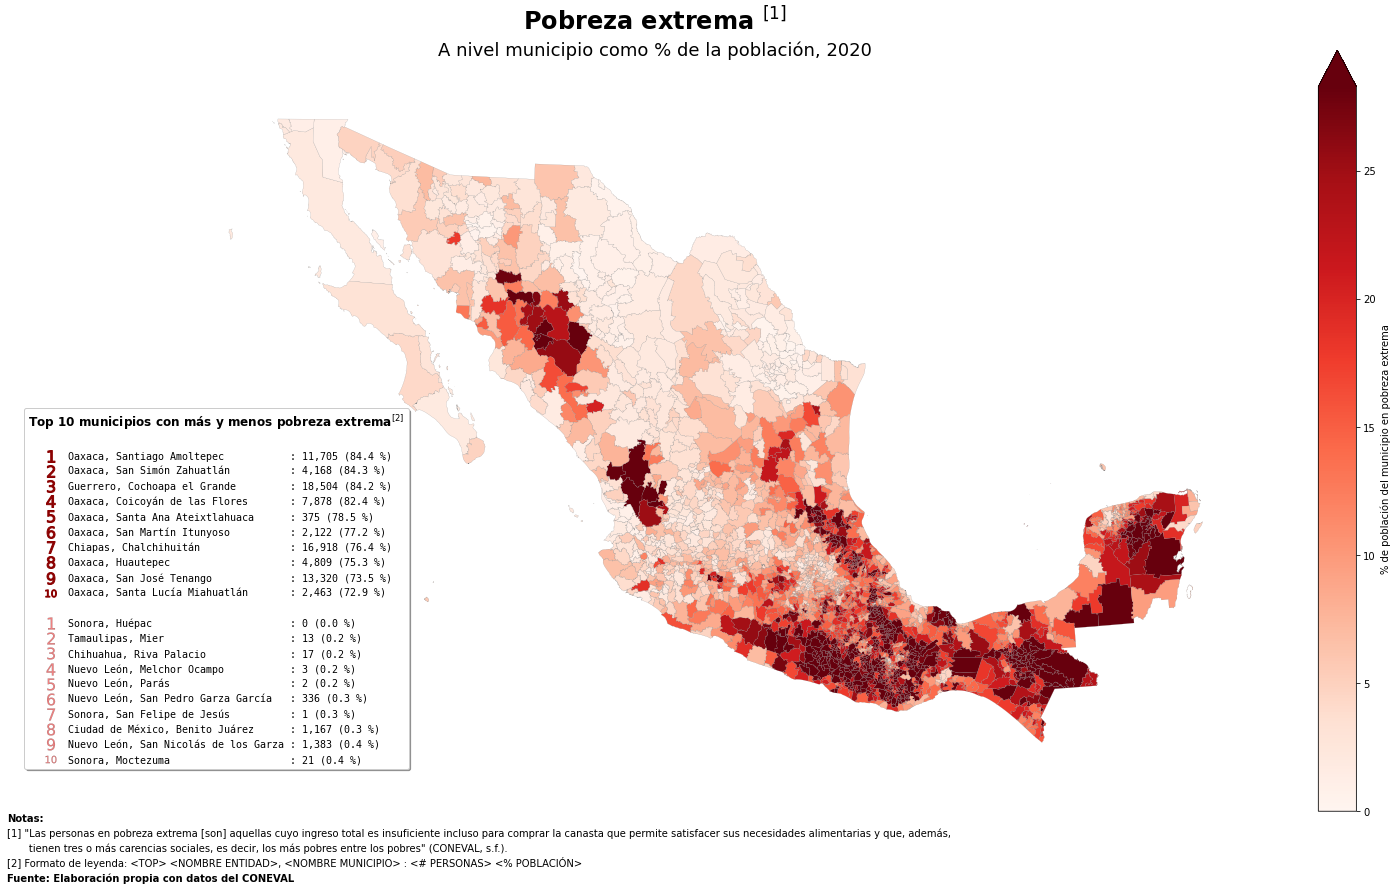

In [38]:
# Crea una figura nueva
fig, ax = plt.subplots(figsize = (24, 14), facecolor = 'white')

# Gráfica la pobreza multidimensional 
pobmun.plot(column = 'Pobreza extrema - Porcentaje 2020', ax = ax, cmap = 'Reds', legend = True,
            vmin = 0, vmax = pobmun['Pobreza extrema - Porcentaje 2020'].quantile(0.8), 
            edgecolor = 'grey', linewidth = 0.15, legend_kwds = {'label': '% de población del municipio en pobreza extrema', 'extend': 'max'})

# Obten el maximo de los top 10 municipios con mas pobreza
pobmun_extrem_legend_10_mas_max = pobmun_extrem_legend_10_mas["entidad_municipio"].str.len().max()

# Obten el maximo de los top 10 municipios con menos pobreza
pobmun_extrem_legend_10_men_max = pobmun_extrem_legend_10_men["entidad_municipio"].str.len().max()

# Obten el maximo de los maximos de top 10
pobmun_extrem_legend_10_max = max([pobmun_extrem_legend_10_mas_max, pobmun_extrem_legend_10_men_max])

handles = []

top_ix = 1

# Agrega los top 10 municipios con más pobreza
for i, municipio in pobmun_extrem_legend_10_mas.iterrows():

    label = f'{municipio["entidad_municipio"]:<{pobmun_extrem_legend_10_max}} : {municipio["pobreza_extrema_resumen"]}'

    # Define la etiqueta de la leyenda
    legend_label = Line2D([0], [0], linewidth = 0, marker = f'${top_ix}$', label = label, markersize = 12,
                        color = 'darkred')
    
    # Agrega a la lista de handles para la leyenda
    handles.append(legend_label)

    # Agrega +1 al indice actual
    top_ix += 1

# Agrega una etiqueta vacia par separar entre mas pobres y menos
handles.append(Line2D([0], [0], linewidth = 0))

# Agrega los top 10 municipios con menos pobreza
top_ix = 1

# Agrega los top 10 municipios con menos pobreza
for i, municipio in pobmun_extrem_legend_10_men.iterrows():

    label = f'{municipio["entidad_municipio"]:<{pobmun_extrem_legend_10_max}} : {municipio["pobreza_extrema_resumen"]}'

    # Define la etiqueta de la leyenda
    legend_label = Line2D([0], [0], linewidth = 0, marker = f'${top_ix}$', label = label, markersize = 12,
                        color = 'lightcoral', markeredgecolor = 'black', markeredgewidth = 0.1)
    
    # Agrega a la lista de handles para la leyenda
    handles.append(legend_label)

    # Agrega +1 al indice actual
    top_ix += 1


# Agrega titulo al mapa
plt.figtext(0.4, 0.9,  'Pobreza extrema $^{[1]}$', size = 24, weight = 'bold', ha = 'center')
plt.figtext(0.4, 0.875, 'A nivel municipio como % de la población, 2020', size = 18, ha = 'center')

# Agregar notas a pie de pagina
# Agregar notas a pie de pagina
plt.figtext(0.025, 0.115, 'Notas:', weight = 'bold', ha = 'left')
plt.figtext(0.025, 0.100, '[1] "Las personas en pobreza extrema [son] aquellas cuyo ingreso total es insuficiente incluso para comprar la canasta que permite satisfacer sus necesidades alimentarias y que, además,', ha = 'left')
plt.figtext(0.025, 0.085, '       tienen tres o más carencias sociales, es decir, los más pobres entre los pobres" (CONEVAL, s.f.).', ha = 'left')
plt.figtext(0.025, 0.070, '[2] Formato de leyenda: <TOP> <NOMBRE ENTIDAD>, <NOMBRE MUNICIPIO> : <# PERSONAS> <% POBLACIÓN>', ha = 'left')
plt.figtext(0.025, 0.055, 'Fuente: Elaboración propia con datos del CONEVAL', ha = 'left', weight = 'bold')

# However, this only improves things slightly. This is because matplotlib is using a variable-width font by default, 
# meaning characters like m take up more space than characters like i. This is fixed by using a fixed-width font. 
# In matplotlib, this is achieved by:
# pl.legend(legends, loc=1, prop={'family': 'monospace'})
plt.legend(handles = handles, bbox_to_anchor = (-0.15, 0), loc = 'lower left', title = 'Top 10 municipios con más y menos pobreza extrema$^{[2]}$\n', ncol = 1, shadow = True,
           prop = {'family': 'monospace'}, title_fontproperties = {'weight': 'bold', 'size': 12})

# Turn off the axis
_ = plt.axis('off')